# Welcome to your notebook

In [203]:
print('Hello notebook')

Hello notebook


In [204]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

X = the set of attributes - age, sex, bmi, bp, and 6 medical measurements
y = the target - a quantitative measure of disease progression one year after baseline

In [205]:
X, y = datasets.load_diabetes(return_X_y=True)
print(X.ndim, X.shape)
print(X[0])

2 (442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


`.shape` is a numpy property which says how deep the sets go and how many in each.

(442,10) means 442 arrays of 10 items each

Each 'level' of array is called an axis in numpy, so we have 2 axes here, 
the first has 442 entries and the second has 10 
(i.e. all 442 have 10, no variation allowed)

X is 442 entries of the 10 attributes

y is the 442 results

In [206]:
Xview = X.view()
X = Xview[:, np.newaxis, 2]
print(X.shape)
print(X[0])

(442, 1)
[0.06169621]


This picks the second attribute from each set.

: - leave outermost dimension alone

np.newaxis - wrap inner one in a new array

2 - pick the third attribute (bmi, presumably)

without np.newaxis, we end up with 1 array of all the bmi's - not what we want.

this way we get 442 arrays of 1 entry, the bmi.

I have no idea why instructions said to overwrite original `X` so I saved it as `origX`, I want to check that the numbers match below

In [207]:
print(X.ndim, X.shape)
print(X[0], X[1])
print(origX[0, 2], origX[1, 2])

2 (442, 1)
[0.06169621] [-0.05147406]
0.0616962065186885 -0.0514740612388061


Yay it matches! Maybe I really do understand what's going on here 😀

Split into training and test data

In [208]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

In [209]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(296, 1) (296,) (146, 1) (146,)


Now we see if the model can detect a link between bmi and diabetes

In [210]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

We now have a trained model, based on 2/3 of the initial data.

Time to see how accurate it is

In [211]:
y_pred = model.predict(X_test)

Just the inputs, no outputs, and this is data the model hasn't seen before

What does y_pred look like? Presumably the same 'shape' as y_test, which is the actual results

In [212]:
print(y_pred.shape)
print(y_test.shape)

(146,)
(146,)


Let's eyeball the first 10 entries, just for fun

In [213]:
print(y_pred[:10])
print(y_test[:10])

[106.13314033 158.77362293 206.44802227 178.63795599 146.8550231
 141.88893983 306.76290422 180.6243893  140.89572318 108.11957364]
[138. 151. 242. 296. 141.  81. 242. 270.  60.  93.]


Let's plot it on a graph

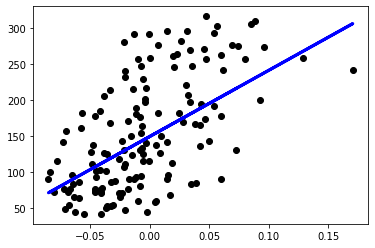

In [214]:
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_test, y_pred, color = 'blue', linewidth = 3)
plt.show()

Are the actual predicted values directly on the line? My prediction: yes

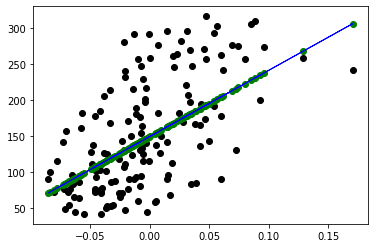

In [215]:
plt.scatter(X_test, y_test, color = 'black')
plt.scatter(X_test, y_pred, color = 'green')
plt.plot(X_test, y_pred, color = 'blue', linewidth = 1)
plt.show()

Note that there is one green dot for every black one, on the X axis. The value on the Y axis is the machine's prediction (i.e. on the line), based on bmi alone

Presumably the point of test data is to see if the prediction matches the reality, but we didn't analyse that here

## Challenge question

Let's use blood sugar level (attribute 10)

In [236]:
X = Xview[:, np.newaxis, 9]
print(X.shape)
print(X[0])

(442, 1)
[0.06169621]


Split into test and train

In [237]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)
print(X_train.shape, y_train.shape)

(296, 1) (296,)


Train

In [238]:
bloodSugarModel = linear_model.LinearRegression()
bloodSugarModel.fit(X_train, y_train)

LinearRegression()

Predict

In [239]:
y_predict = bloodSugarModel.predict(X_test)

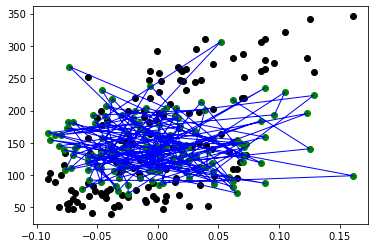

In [243]:
plt.scatter(X_test, y_test, color = 'black')
plt.scatter(X_test, y_pred, color = 'green')
plt.plot(X_test, y_pred, color = 'blue', linewidth = 1)
plt.show()

I am ... not quite sure what happened here :)

Does this mean the machine couldn't figure out any correlation? Surely it's still supposed to give a straight line, even if it's not tightly correlated?

Ah, typo 😊

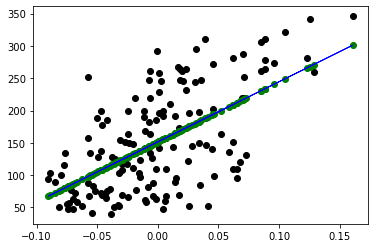

In [244]:
y_pred = bloodSugarModel.predict(X_test)
plt.scatter(X_test, y_test, color = 'black')
plt.scatter(X_test, y_pred, color = 'green')
plt.plot(X_test, y_pred, color = 'blue', linewidth = 1)
plt.show()

That is more like it

Ok, this is pretty cool, but surely Excel could do this 20 years ago? I remember making a graph and telling Excel to 'Add trendline', and nobody called it machine learning back then...

And I'm still not sure why we are using test data, we didn't actually test it